## Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
cardio_data_train = pd.read_csv("cardio-train.csv", sep = ";")
cardio_data_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,NaN,163.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,10483,19761.0,NaN,170.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,NaN,89.0,NaN,80.0,Normal,NaN,0.0,NaN,NaN,0
4,85542,NaN,NaN,158.0,74.0,NaN,93.0,High,NaN,0.0,1.0,1.0,1


In [3]:
print("Number of features in the cardio data: ",len(cardio_data_train.columns))
print("Features: ")
print("-"*10)
features_desc_from_kaggle = ["id","Age(days)", "Gender","Height(cm)", "Weight(kg)", "Systolic blood pressure", \
 "Diastolic blood pressure", "Cholesterol", "Glucose", "Smoking" ,\
 "Alcohol intake", "Physical activity", "Presence(1) or absence(0) of cardiovascular disease (Target Variable)"]


for i in range(len(cardio_data_train.columns)):
    print(cardio_data_train.columns[i]+" -----> "+features_desc_from_kaggle[i])

Number of features in the cardio data:  13
Features: 
----------
id -----> id
age -----> Age(days)
gender -----> Gender
height -----> Height(cm)
weight -----> Weight(kg)
ap_hi -----> Systolic blood pressure
ap_lo -----> Diastolic blood pressure
cholesterol -----> Cholesterol
gluc -----> Glucose
smoke -----> Smoking
alco -----> Alcohol intake
active -----> Physical activity
cardio -----> Presence(1) or absence(0) of cardiovascular disease (Target Variable)


#### 1. Identify the dataset columns into nominal, categorical, continues etc. categories

- **Nominal (Categorical) features** : gender, cholesterol, gluc, smoke, alco, active
- **Numeric (Continuous) Features** : age, height, weight, ap_hi, ap_lo
- **Target variable** : cardio

#### 2. Use dataframe.info and dataframe.describe to get the insights about the data.

In [4]:
cardio_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   age          335 non-null    float64
 2   gender       329 non-null    object 
 3   height       198 non-null    float64
 4   weight       336 non-null    float64
 5   ap_hi        347 non-null    float64
 6   ap_lo        332 non-null    float64
 7   cholesterol  333 non-null    object 
 8   gluc         333 non-null    object 
 9   smoke        326 non-null    float64
 10  alco         335 non-null    float64
 11  active       343 non-null    float64
 12  cardio       500 non-null    int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 50.9+ KB


**Observations:**
- We can see presence of NaN(missing) values in all columns except 'id' and 'cardio'.
- Most NaN values are in 'height' column. as non-null count is very low.
- Float values are present in 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco', and 'active'. These columns are numeric and continuous. Int values are present in 'id' and 'cardio' columns.
- For columns 'gender', 'cholesterol' and 'gluc' we see data type as object because these are categorical features with string values.

In [5]:
cardio_data_train.describe()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,500.000000,335.000000,198.000000,336.000000,347.000000,332.000000,326.000000,335.000000,343.000000,500.000000
mean,50279.916000,19490.886567,163.934343,74.347321,128.685879,90.060241,0.092025,0.065672,0.813411,0.502000
std,29913.623631,2466.702487,8.258559,14.335964,18.490176,87.396945,0.289505,0.248078,0.390150,0.500497
min,38.000000,14334.000000,120.000000,45.000000,12.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,23446.500000,17988.500000,159.250000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,51913.500000,19719.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,1.000000
75%,78656.000000,21597.500000,168.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99662.000000,23479.000000,187.000000,155.000000,190.000000,1000.000000,1.000000,1.000000,1.000000,1.000000


**Observations:**
- In the output of describe function, we can see basic stats like min, max, 25%, 50%, 75%, mean and std values for numerical columns in our dataset.
- Count represents number of present(non-null) values in each column.
- We can see that range of each column is very different.  i.e. 'age' has very high values compared to 'active' or 'smoke' (0/1 values). We can guess that 'age' is given in days. 'ap_lo' has max value which is very high compared to other values of same column, which suggests presence of outlier(s). 

#### 3. Find the number of null values for each columns

In [6]:
for col in cardio_data_train.columns:
    print("number of null values in column " + col + ":", cardio_data_train[col].isnull().sum())

number of null values in column id: 0
number of null values in column age: 165
number of null values in column gender: 171
number of null values in column height: 302
number of null values in column weight: 164
number of null values in column ap_hi: 153
number of null values in column ap_lo: 168
number of null values in column cholesterol: 167
number of null values in column gluc: 167
number of null values in column smoke: 174
number of null values in column alco: 165
number of null values in column active: 157
number of null values in column cardio: 0


#### 4. Know about the patients (Example of analysis for ages)

In [7]:
#age is given in days, we can convert it to years by age = age/365
cardio_data_train['age'] = (cardio_data_train['age']/365).round()
data_age = cardio_data_train['age'].round().describe()
print("a. Oldest person in the data is : %0.1f years" % data_age['max'])
print("b. Youngest person in the data is : %0.1f years" % data_age['min'])
print("c. Average age of a person in the data is : %0.1f years" % data_age['mean'])
print("d. Median age of a person in the data is : %0.1f years" % data_age['50%'])

a. Oldest person in the data is : 64.0 years
b. Youngest person in the data is : 39.0 years
c. Average age of a person in the data is : 53.4 years
d. Median age of a person in the data is : 54.0 years


#### e. Find the relationship between the cardio and ages (the cardio column is your prediction variable)

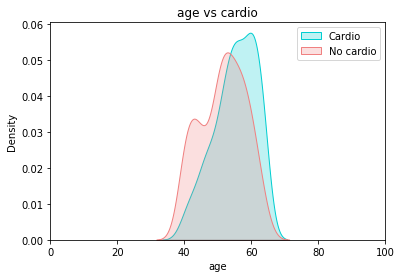

In [8]:
age_non_null = pd.DataFrame(cardio_data_train[cardio_data_train.age.notnull()])
sns.kdeplot(
    data = age_non_null.loc[(age_non_null['cardio'] == 1), 'age'],
    color = 'darkturquoise',
    shade = True
)
sns.kdeplot(
    data = age_non_null.loc[(age_non_null['cardio'] == 0), 'age'],
    color = 'lightcoral',
    shade = True
)
plt.legend(['Cardio', 'No cardio'])
plt.title('age vs cardio')
plt.xlim(0, 100)
plt.show()

**Observation:**
- As we can see from the density plot, age density distribution of people with cardio disease is on the right side of density distribution of people with no cardio disease. 
- This suggests that people with higher age(>55) have more risk for cardio disease than people with lesser age(<45).

#### f. Find the age groups whose survival rate is the largest

In [9]:
# using only the records that have value for 'age' column
bins = ["30-35", "35-40", "40-45", "45-50", "50-55", "55-60", "60-65", "65-70", "70-75"]
lo = [30, 35, 40, 45, 50, 55, 60, 65, 70]
hi = [35, 40, 45, 50, 55, 60, 65, 70, 75]
counts = [0] * len(bins)
survivors = [0] * len(bins)
ages = pd.DataFrame(age_non_null['age'])
cardios = pd.DataFrame(age_non_null['cardio'])
bins_age = [''] * len(ages)
print("creating bins of", str(len(ages)), "people.")
for r in range(len(ages)):
    age = ages.values[r]
    cardio = cardios.values[r]
    for i in range(len(bins)):
        if age >= lo[i] and age < hi[i]:
            counts[i] += 1
            bins_age[r] = bins[i]
            if cardio == 0:
                survivors[i] += 1
            break

for i in range(len(bins)):
    sur_rate = 0
    if counts[i] != 0:
        sur_rate = survivors[i]/counts[i]
    print("In age group", bins[i], ", total people:", counts[i], ", people with no cardio:", survivors[i], ", survival rate:", round(sur_rate, 2))
    

creating bins of 335 people.
In age group 30-35 , total people: 0 , people with no cardio: 0 , survival rate: 0
In age group 35-40 , total people: 1 , people with no cardio: 1 , survival rate: 1.0
In age group 40-45 , total people: 48 , people with no cardio: 36 , survival rate: 0.75
In age group 45-50 , total people: 37 , people with no cardio: 18 , survival rate: 0.49
In age group 50-55 , total people: 96 , people with no cardio: 51 , survival rate: 0.53
In age group 55-60 , total people: 73 , people with no cardio: 34 , survival rate: 0.47
In age group 60-65 , total people: 80 , people with no cardio: 22 , survival rate: 0.28
In age group 65-70 , total people: 0 , people with no cardio: 0 , survival rate: 0
In age group 70-75 , total people: 0 , people with no cardio: 0 , survival rate: 0


Age group 40-45 has the most survival rate.

Note: Ignoring the 1 person in age group 35-40 as we cannot generalize survival rate for that age group.

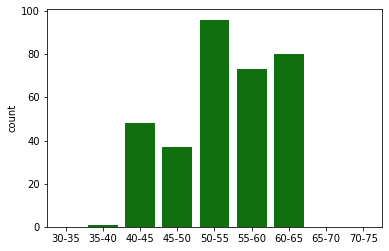

In [10]:
sns.countplot(x=bins_age, color="g", order = bins)
plt.show()

**Observations:**
- From countplot above, we can see the distribution of people in age groups of 5 years. 
- People can be divided into bins from age 35-40 to 60-65 as we have people from age 39 to 64 years in our data.
- We have highest count of people from age group 50-55. 
- 75% of people from age group 40-45 (36 out of 38) have cardio=0, which makes it age group with highest survival rate.

Let's replace categorical features having non-numerical values with integer values.

In [11]:
print("cholesterol unique values: ", cardio_data_train["cholesterol"].unique())
print("glucose unique values: ", cardio_data_train["gluc"].unique())
print("gender unique values: ", cardio_data_train["gender"].unique())

cholesterol unique values:  [nan 'Normal' 'High' 'Above Normal']
glucose unique values:  ['Normal' nan 'High' 'Above Normal']
gender unique values:  [nan 'Men' 'Women']


In [12]:
from sklearn.preprocessing import LabelEncoder
cardio_data_train["cholesterol"] = LabelEncoder().fit_transform(cardio_data_train["cholesterol"])
cardio_data_train["gluc"] = LabelEncoder().fit_transform(cardio_data_train["gluc"])
cardio_data_train["gender"] = LabelEncoder().fit_transform(cardio_data_train["gender"])

Train data: 
Number of data points for class_0: 249 
Number of data points for class_1: 251 


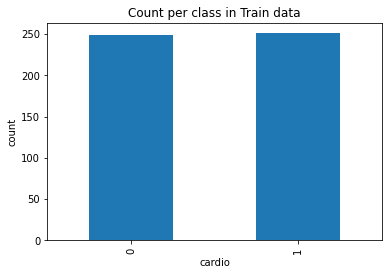

In [13]:
#getting the number of points each class has
class_0 = len(cardio_data_train[cardio_data_train["cardio"] == 0])
class_1 = len(cardio_data_train[cardio_data_train["cardio"] == 1])

print("Train data: ")
print("Number of data points for class_0: %d "%class_0)
print("Number of data points for class_1: %d "%class_1)

cardio_data_train.groupby("cardio")["id"].count().plot.bar()
plt.ylabel("count")
plt.title("Count per class in Train data")
plt.show()

In [14]:
#dropping the "id" column
cardio_data_train.drop("id", axis=1, inplace=True)

In [15]:
cardio_data_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.0,2,163.0,75.0,120.0,NaN,3,2,0.0,0.0,1.0,0
1,44.0,0,168.0,68.0,110.0,70.0,3,3,0.0,0.0,NaN,0
2,54.0,2,170.0,75.0,120.0,NaN,3,2,0.0,0.0,1.0,1
3,52.0,0,NaN,89.0,NaN,80.0,2,3,0.0,NaN,NaN,0
4,NaN,2,158.0,74.0,NaN,93.0,1,3,0.0,1.0,1.0,1


In [16]:
cardio_data_train.isna().sum()

age            165
gender           0
height         302
weight         164
ap_hi          153
ap_lo          168
cholesterol      0
gluc             0
smoke          174
alco           165
active         157
cardio           0
dtype: int64

In [17]:
#replacing NaN values with mean in numerical before finding relationships between features and target variable
#replacing NaN values with mode in categorical attributes

from scipy import stats

numerical_columns = ["age", "ap_hi", "ap_lo", "smoke", "alco", "active", "height", "weight"]
for col in numerical_columns:
    cardio_data_train.loc[:,col].replace(np.nan, np.nanmean(cardio_data_train[col]), inplace=True)


categorical_columns = ["cholesterol","gluc","gender"]
for col in categorical_columns:
    cardio_data_train.loc[:,col].replace(np.nan, stats.mode(cardio_data_train[col])[0][0], inplace=True)

cardio_data_train.isna().sum()


age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

#### g. Find similar relationships for at least 3-4 columns that you think can play a role in prediction (For example, systolic BP, cholesterol etc.)

Using density plots to find relationships between few features and target variable. 
Note: All the NaN values have been replaced with mean(numeric features)/mode(categorical features) in previous cell. So now, in following plots, we will use entire training set (500 rows).

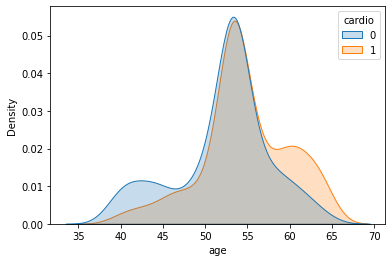

In [18]:
sns.kdeplot(x="age",hue="cardio",fill=True,data=cardio_data_train)
plt.show()

**Observations:**
- We can see in the kde plot that people arround the age 35-45 have higher chance of cardio=0.
- People around the age 50-55 have high survival rate as well as high fatality rate. 
- People with age 57-70 have high chance of having cardio=1.

[]

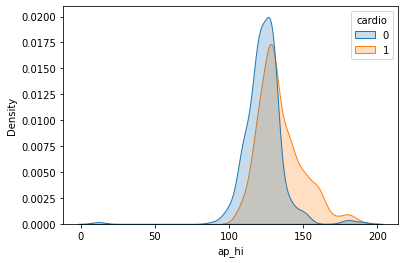

In [19]:
sns.kdeplot(x="ap_hi",hue="cardio",fill=True,data=cardio_data_train)
plt.plot()

**Observations:**
- People with average Systolic blood pressure(ap_hi) have higher chance of having cardio=0, i.e. there is higher chance that they don't have cardio disease.

[]

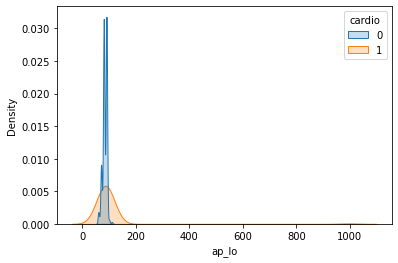

In [20]:
sns.kdeplot(x="ap_lo",hue="cardio",fill=True,data=cardio_data_train)
plt.plot()

**Observations:**
- We can see from density plot of ap_lo that people with average Diastolic blood pressure(ap_lo) have very high probability of not having cardio disease. 

[]

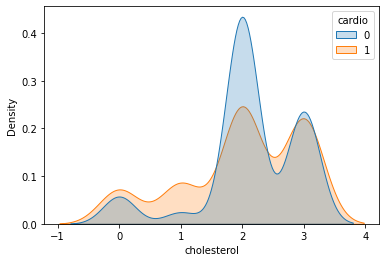

In [21]:
sns.kdeplot(x="cholesterol",hue="cardio",fill=True,data=cardio_data_train)
plt.plot()

**Observations:**
- From density plot of cholesterol, we can see that people with Normal(0) cholesterol have higher chance of cardio=0. i.e. there is high chance that they will not have cardio disease, than people who have more cholesterol. 

[]

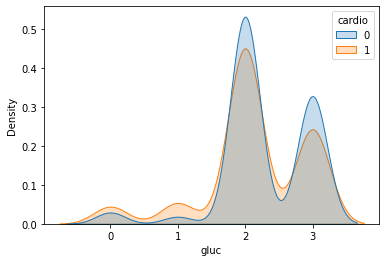

In [22]:
sns.kdeplot(x="gluc",hue="cardio",fill=True,data=cardio_data_train)
plt.plot()

**Observations:**
- In the "gluc" kde plot, we can see that, people who have Normal(0) glucose have higher chance of cardio=0, i.e there is a high chance that they wont have cardiovascular disease, than the people who have more glucose.

[]

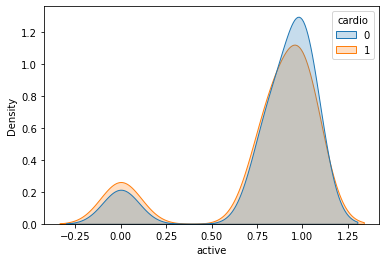

In [23]:
sns.kdeplot(x="active",hue="cardio",fill=True,data=cardio_data_train)
plt.plot()

**Observations:**
- In the "active" kde plot, we can see that, people who are more physically active have a slightly higher chance of cardio = 0, i.e there is a high chance that they won't have cardiovascular disease, than the people who have less physically active.

[]

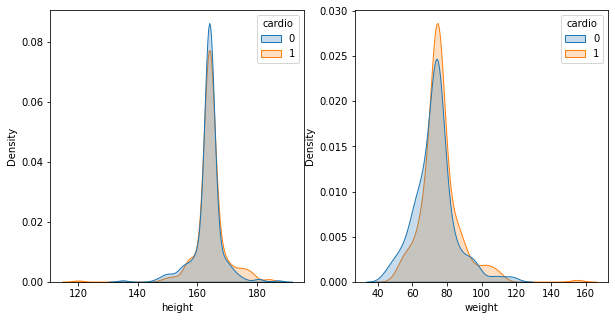

In [24]:
fig,ax = plt.subplots(1,2, figsize=(10,5))
sns.kdeplot(x="height",hue="cardio",fill=True,data=cardio_data_train,ax=ax[0])
sns.kdeplot(x="weight",hue="cardio",fill=True,data=cardio_data_train,ax=ax[1])
plt.plot()

**Observations:**
- In kde plot of height, the plot of cardio=0 and cardio=1 is roughly the same and from this we can also tell height column does not add much importance, so we can drop height column when we are building our model.
- In kde plot of weight, the plot of cardio=0 and cardio=1 is roughly the same and from this we can also tell weight column does not add much importance, so we can drop weight column when we are building our model.

#### h. Get more visuals on data distributions

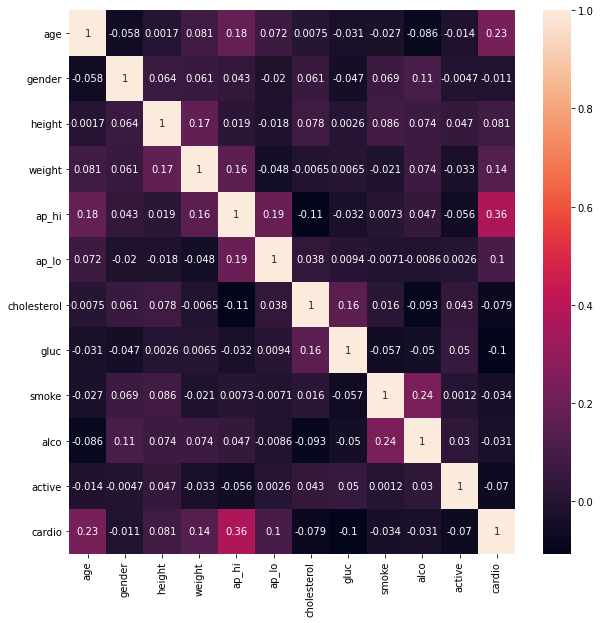

In [25]:
#i. Use plotCorrelationMatrix
corr_matrix = cardio_data_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

<Figure size 432x288 with 0 Axes>

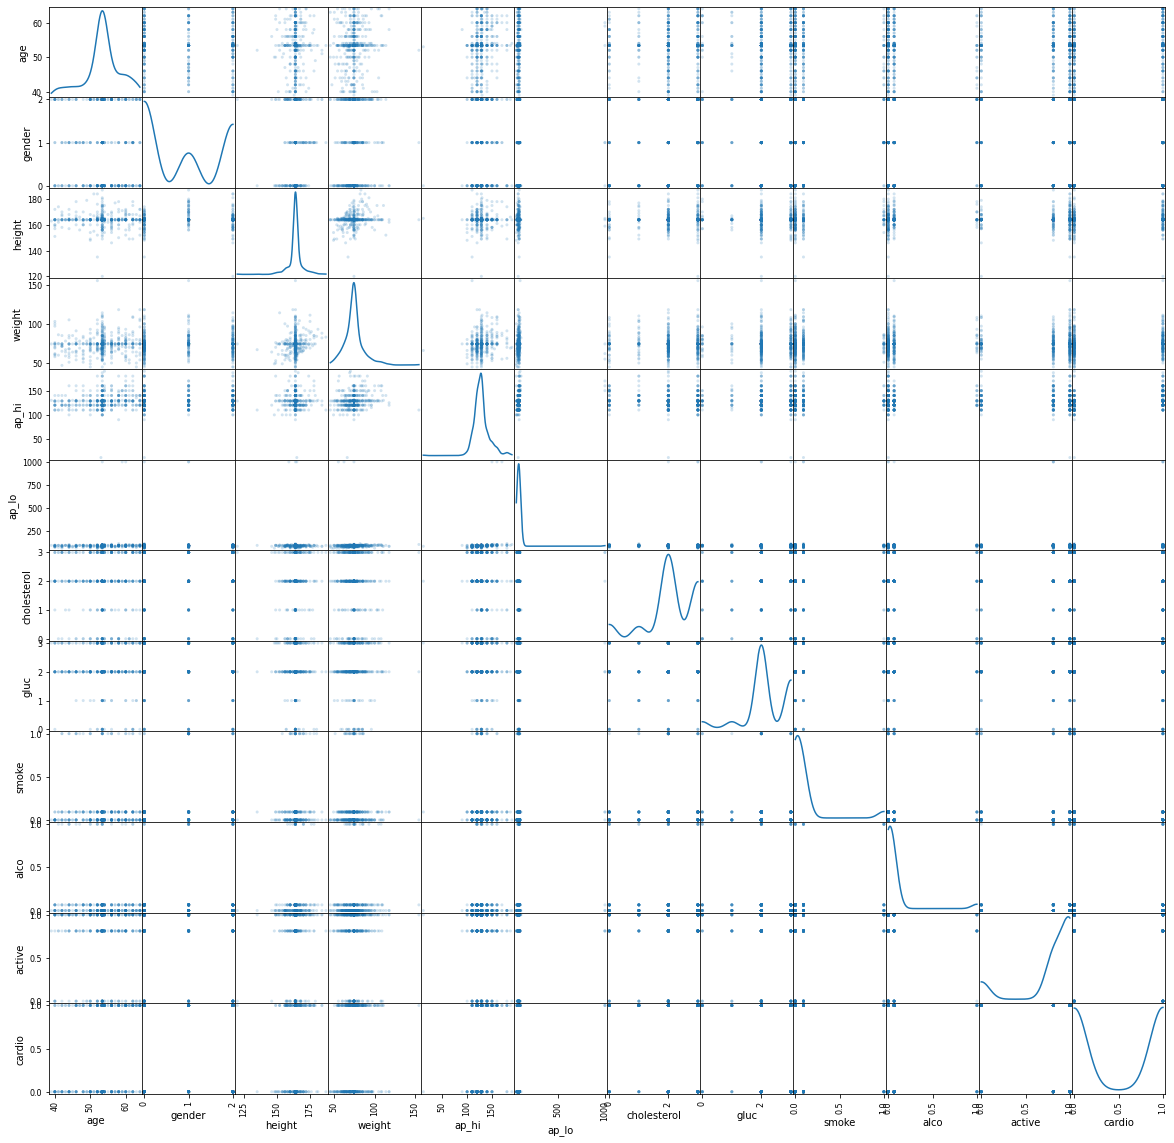

In [26]:
# ii. plotScatterMatrix
plt.figure()
pd.plotting.scatter_matrix(cardio_data_train, figsize=(20,20), diagonal="kde", alpha=0.2)
plt.show()

[]

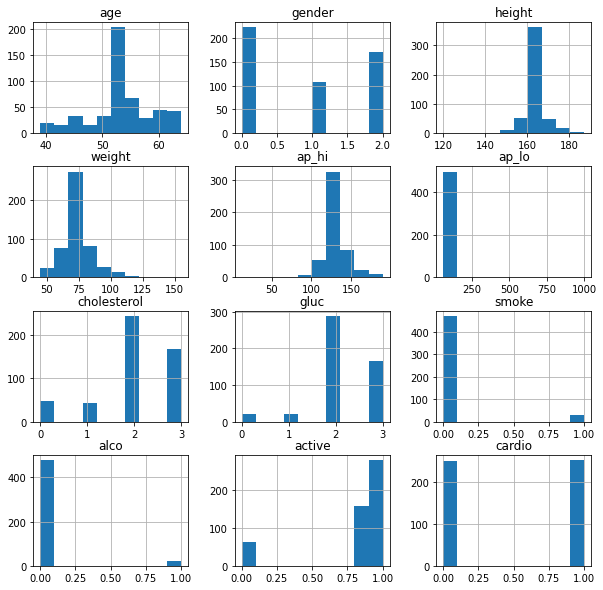

In [27]:
#iii. plotPerColumnDistribution
cardio_data_train.hist(figsize=(10,10))
plt.plot()

**Observations:**
- 'ap_hi', 'age', 'cholesterol' have highest correlation with cardio in decreasing order, suggesting that these are top 3 most important features.
- 'height', 'gender', 'smoke', 'alco', 'active' these features have very less correlation with cardio. These columns will contribute very less in our prediction task.

#### i. Find missing values

#### i. Get the count of missing values

In [33]:
cardio_data_train_missing = pd.read_csv("cardio-train.csv", sep=";")
for col in cardio_data_train_missing.columns:
    print("number of null values in column " + col + ":", cardio_data_train_missing[col].isnull().sum())

number of null values in column id: 0
number of null values in column age: 165
number of null values in column gender: 171
number of null values in column height: 302
number of null values in column weight: 164
number of null values in column ap_hi: 153
number of null values in column ap_lo: 168
number of null values in column cholesterol: 167
number of null values in column gluc: 167
number of null values in column smoke: 174
number of null values in column alco: 165
number of null values in column active: 157
number of null values in column cardio: 0


#### ii. Plot a heat map for missing values

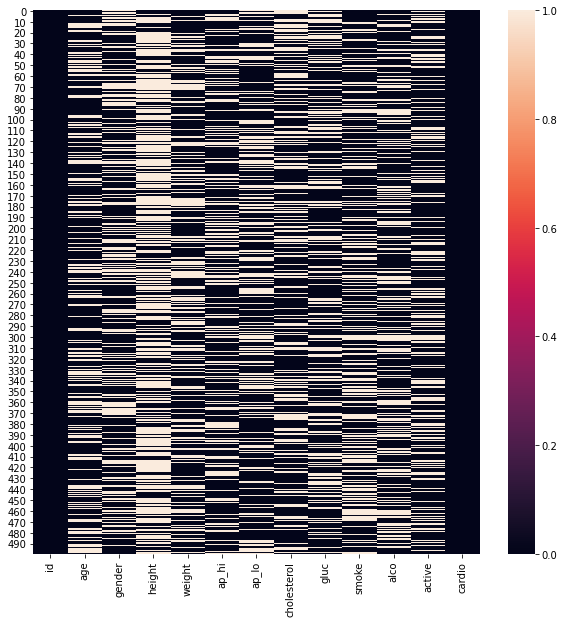

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(cardio_data_train_missing.isnull())
plt.show()

**Observations:**
- Above plot shows the heatmap of null values per column.
- We can clearly see that 'height' column has most null values as it has most light colour. 
- 'cardio' and 'id' has entire column with black colour, which indicates 0 missing values for these columns.

In [35]:
# custom label encoder methods for categorical columns

#High=2, Above Normal=1, Normal=0
def replace012(x):
    if x == "High":
        return 2
    elif x == "Above Normal":
        return 1
    elif x =="Normal":
        return 0
#Women=0, Men=1
def replace01(x):
    if x == "Women":
        return 0
    elif x == "Men":
        return 1

In [36]:
# turning categorical string values into numerical values
cardio_data_train_missing["cholesterol"] = cardio_data_train_missing["cholesterol"].apply(replace012)
cardio_data_train_missing["gluc"] = cardio_data_train_missing["gluc"].apply(replace012)
cardio_data_train_missing["gender"] = cardio_data_train_missing["gender"].apply(replace01) 
cardio_data_train_missing.drop("id",axis=1,inplace=True)

#### j. Applying a different technique to handle missing values (For each technique verify your prediction results)

In [37]:
# defining a method to train logistic regression model on given data
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

def test_logistic_regression_model(data):
    scaler = MinMaxScaler()
    y = data.loc[:,"cardio"]
    X = data.drop("cardio",1)
    X = scaler.fit_transform(X)
    x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
    clf = LogisticRegression()
    clf.fit(x_train,y_train)

    y_pred_test = clf.predict(x_test)
    y_pred_train = clf.predict(x_train)

    accuracy_train = accuracy_score(y_train,y_pred_train)
    accuracy_test = accuracy_score(y_test,y_pred_test)
    f1 = f1_score(y_test,y_pred_test)
    return accuracy_train, accuracy_test, f1


In [38]:
def print_null_values(data):
    for col in data.columns:
        print("number of null values in column " + col + ":", data[col].isnull().sum())

#### i. Use dropna

In [39]:
drop_na_data_train = cardio_data_train_missing.copy()
drop_na_data_train = drop_na_data_train.dropna()
print_null_values(drop_na_data_train)

number of null values in column age: 0
number of null values in column gender: 0
number of null values in column height: 0
number of null values in column weight: 0
number of null values in column ap_hi: 0
number of null values in column ap_lo: 0
number of null values in column cholesterol: 0
number of null values in column gluc: 0
number of null values in column smoke: 0
number of null values in column alco: 0
number of null values in column active: 0
number of null values in column cardio: 0


In [40]:
accuracy_train, accuracy_test, f1 = test_logistic_regression_model(drop_na_data_train)
print("Train Accuracy after dropping rows with NaN values: ",accuracy_train)
print("Test Accuracy after dropping rows with NaN values: ",accuracy_test)
print("f1 score after dropping rows with NaN values: ",f1)

Train Accuracy after dropping rows with NaN values:  1.0
Test Accuracy after dropping rows with NaN values:  0.5
f1 score after dropping rows with NaN values:  0.0


**Observations:**
- Test accuracy with dropna strategy is 0.5, which is same as random guess.
- So, dropping NaN values is not a good strategy.

#### ii. Use replace NA with zero or max value

In [41]:
replace_zero_data_train = cardio_data_train_missing.copy()
replace_zero_data_train.replace(np.nan, 0, inplace=True)
print_null_values(replace_zero_data_train)

number of null values in column age: 0
number of null values in column gender: 0
number of null values in column height: 0
number of null values in column weight: 0
number of null values in column ap_hi: 0
number of null values in column ap_lo: 0
number of null values in column cholesterol: 0
number of null values in column gluc: 0
number of null values in column smoke: 0
number of null values in column alco: 0
number of null values in column active: 0
number of null values in column cardio: 0


In [42]:
accuracy_train, accuracy_test, f1 = test_logistic_regression_model(replace_zero_data_train)
print("Train Accuracy after replacing NaN with 0: ",accuracy_train)
print("Test Accuracy after replacing NaN with 0: ",accuracy_test)
print("f1 score after replacing NaN with 0: ",f1)

Train Accuracy after replacing NaN with 0:  0.6375
Test Accuracy after replacing NaN with 0:  0.56
f1 score after replacing NaN with 0:  0.56


**Observations:**
- Replacing NaN with 0 gives test accuracy of 56%, which is improvement from dropna, but it is very bad accuracy for binary classification problem.

#### iii. Use replace NA with mean

In [43]:
mean_replace_cardio_train = cardio_data_train_missing.copy()
for x in mean_replace_cardio_train.columns:
    mean_column = np.nanmean(mean_replace_cardio_train[x].values)
    mean_replace_cardio_train[x].replace(np.nan, mean_column, inplace=True)
print_null_values(mean_replace_cardio_train)

number of null values in column age: 0
number of null values in column gender: 0
number of null values in column height: 0
number of null values in column weight: 0
number of null values in column ap_hi: 0
number of null values in column ap_lo: 0
number of null values in column cholesterol: 0
number of null values in column gluc: 0
number of null values in column smoke: 0
number of null values in column alco: 0
number of null values in column active: 0
number of null values in column cardio: 0


In [44]:
accuracy_train, accuracy_test, f1 = test_logistic_regression_model(mean_replace_cardio_train)
print("Train Accuracy after replacing NaN with mean: ",accuracy_train)
print("Test Accuracy after replacing NaN with mean: ",accuracy_test)
print("f1 score after replacing NaN with mean: ",f1)

Train Accuracy after replacing NaN with mean:  0.685
Test Accuracy after replacing NaN with mean:  0.68
f1 score after replacing NaN with mean:  0.6923076923076923


**Observations:**
- After replacing NaN values with mean of individual columns, we get test accuracy of 68% and f1 score of 69%. which is better result than previous 2 strategies.
- This method of replacement is better than dropna and replace with 0.

#### iv. Search for additional techniques to handle null values, excluding the above three and test.

#### Use replace NA with median

In [45]:
median_replace_cardio_train = cardio_data_train_missing.copy()
for col in median_replace_cardio_train.columns:
    median_column = np.nanmedian(median_replace_cardio_train[col].values)
    median_replace_cardio_train[col].replace(np.nan, median_column, inplace=True)
print_null_values(median_replace_cardio_train)

number of null values in column age: 0
number of null values in column gender: 0
number of null values in column height: 0
number of null values in column weight: 0
number of null values in column ap_hi: 0
number of null values in column ap_lo: 0
number of null values in column cholesterol: 0
number of null values in column gluc: 0
number of null values in column smoke: 0
number of null values in column alco: 0
number of null values in column active: 0
number of null values in column cardio: 0


In [46]:
accuracy_train, accuracy_test, f1 = test_logistic_regression_model(median_replace_cardio_train)
print("Train Accuracy after replacing NaN with median: ",accuracy_train)
print("Test Accuracy after replacing NaN with median: ",accuracy_test)
print("f1 score after replacing NaN with median: ",f1)

Train Accuracy after replacing NaN with median:  0.7
Test Accuracy after replacing NaN with median:  0.62
f1 score after replacing NaN with median:  0.6415094339622641


**Observations:**
- After replacing NaN values with median of individual columns, we get test accuracy of 62% and f1 score of 64%.
- Replacing NaN with mean is better strategy than replacing NaN with median.

#### Use replace NA with mode

In [47]:
mode_replace_cardio_train = cardio_data_train_missing.copy()
for col in mode_replace_cardio_train.columns:
    mode_column, _ = stats.mode(mode_replace_cardio_train[col])
    mode_replace_cardio_train[col].replace(np.nan, mode_column[0], inplace=True)
print_null_values(mode_replace_cardio_train)

number of null values in column age: 0
number of null values in column gender: 0
number of null values in column height: 0
number of null values in column weight: 0
number of null values in column ap_hi: 0
number of null values in column ap_lo: 0
number of null values in column cholesterol: 0
number of null values in column gluc: 0
number of null values in column smoke: 0
number of null values in column alco: 0
number of null values in column active: 0
number of null values in column cardio: 0


In [48]:
accuracy_train, accuracy_test, f1 = test_logistic_regression_model(mode_replace_cardio_train)
print("Train Accuracy after replacing NaN with median: ",accuracy_train)
print("Test Accuracy after replacing NaN with median: ",accuracy_test)
print("f1 score after replacing NaN with median: ",f1)

Train Accuracy after replacing NaN with median:  0.675
Test Accuracy after replacing NaN with median:  0.71
f1 score after replacing NaN with median:  0.7184466019417476


**Observations:**
- After replacing NaN values with mode of individual columns, we get test accuracy of 71% and f1 score of 71%.
- Replacing NaN with mode is better strategy than replacing NaN with mean or median.

## l. Applying the model

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

train_data = pd.read_csv("cardio-train.csv", sep=";")
print(train_data.shape)
train_data.head()

(500, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,NaN,163.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,10483,19761.0,NaN,170.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,NaN,89.0,NaN,80.0,Normal,NaN,0.0,NaN,NaN,0
4,85542,NaN,NaN,158.0,74.0,NaN,93.0,High,NaN,0.0,1.0,1.0,1


In [50]:
validation_data = pd.read_csv("cardio-validation.csv", sep=",")
print(validation_data.shape)
validation_data.head()

(500, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,17934,18936.0,Men,165.0,60.0,NaN,80.0,Normal,NaN,0.0,0.0,1.0,1
1,52450,17987.0,NaN,NaN,58.8,120.0,90.0,Normal,Normal,NaN,0.0,1.0,0
2,37653,NaN,NaN,159.0,93.0,130.0,90.0,High,Normal,0.0,0.0,NaN,1
3,96970,22851.0,Women,172.0,NaN,NaN,100.0,Normal,Normal,0.0,0.0,1.0,1
4,50977,NaN,Women,NaN,116.0,NaN,80.0,High,NaN,NaN,NaN,1.0,1


In [51]:
train_data.describe()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,500.000000,335.000000,198.000000,336.000000,347.000000,332.000000,326.000000,335.000000,343.000000,500.000000
mean,50279.916000,19490.886567,163.934343,74.347321,128.685879,90.060241,0.092025,0.065672,0.813411,0.502000
std,29913.623631,2466.702487,8.258559,14.335964,18.490176,87.396945,0.289505,0.248078,0.390150,0.500497
min,38.000000,14334.000000,120.000000,45.000000,12.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,23446.500000,17988.500000,159.250000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,51913.500000,19719.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,1.000000
75%,78656.000000,21597.500000,168.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99662.000000,23479.000000,187.000000,155.000000,190.000000,1000.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
train_data.isna().sum()

id               0
age            165
gender         171
height         302
weight         164
ap_hi          153
ap_lo          168
cholesterol    167
gluc           167
smoke          174
alco           165
active         157
cardio           0
dtype: int64

In [53]:
train_data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [55]:
# custom label encoder methods for categorical columns

#High=2, Above Normal=1, Normal=0
def replace012(x):
    if x == "High":
        return 2
    elif x == "Above Normal":
        return 1
    elif x =="Normal":
        return 0
#Women=0, Men=1
def replace01(x):
    if x == "Women":
        return 0
    elif x == "Men":
        return 1

In [54]:
mean_cols = ['age', 'ap_hi']
median_cols = ['ap_lo', 'height', 'weight']
mode_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
# outlier_cols = ['height', 'weight', 'ap_lo']
outlier_cols = []
categorical_columns = ['cholesterol', 'gluc', 'gender']

In [56]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
pd.options.mode.chained_assignment = None
def preprocess(d):
    data = d.copy()
    data.drop(["id"], axis=1, inplace=True, errors='ignore')
    
#     data["cholesterol"] = data["cholesterol"].apply(replace012)
#     data["gluc"] = data["gluc"].apply(replace012)
#     data["gender"] = data["gender"].apply(replace01)
    
    for col in categorical_columns:
        data[col] = LabelEncoder().fit_transform(data[col])
    
    data["age"] = (data["age"]/365).round()
        
    # replace NaN
    for col in mean_cols:
        mean_column = np.nanmean(data[col].values)
        data[col].replace(np.nan, mean_column, inplace=True)
    for col in median_cols:
        median_column = np.nanmedian(data[col].values)
        data[col].replace(np.nan, median_column, inplace=True)
    for col in mode_cols:
        mode_column, _ = stats.mode(data[col])
        data[col].replace(np.nan, mode_column[0], inplace=True)
        
    # ourlier handling
    for col in outlier_cols:
        low = data[col].quantile(0.10)
        high = data[col].quantile(0.90)
        med = data[col].quantile(0.50)
        data[col] = np.where(data[col] < low, med, data[col])
        data[col] = np.where(data[col] > high, med, data[col])
    
        
#     data["bmi"] = data["weight"] / (data["height"] * 0.01 * data["height"] * 0.01)
#     data.drop(["height", "weight"], axis=1, inplace=True, errors='ignore')
    
#     data = pd.concat((data,pd.get_dummies(data.cholesterol)),1)
#     data = pd.concat((data,pd.get_dummies(data.gluc)),1)
#     data = pd.concat((data,pd.get_dummies(data.gender)),1)
#     data.drop(["cholesterol", "gluc", "gender"], axis=1, inplace=True, errors='ignore')

    return data


In [57]:
# train_data = preprocess(train_data)
# validation_data = preprocess(validation_data)
total_train_data = train_data.append(validation_data)
total_train_data = preprocess(total_train_data)

In [58]:
total_train_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.000000,2,163.0,75.0,120.000000,80.0,3,2,0.0,0.0,1.0,0
1,44.000000,0,168.0,68.0,110.000000,70.0,3,3,0.0,0.0,1.0,0
2,54.000000,2,170.0,75.0,120.000000,80.0,3,2,0.0,0.0,1.0,1
3,52.000000,0,165.0,89.0,127.485675,80.0,2,3,0.0,0.0,1.0,0
4,53.204703,2,158.0,74.0,127.485675,93.0,1,3,0.0,1.0,1.0,1


In [59]:
total_train_data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [60]:
total_train_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,53.204703,0.787000,164.642000,73.485800,127.485675,90.865000,1.993000,2.085000,0.06100,0.036000,0.853000,0.493000
std,5.780754,0.839247,6.039065,12.384312,15.168163,95.622196,0.863537,0.728221,0.23945,0.186383,0.354283,0.500201
min,39.000000,0.000000,120.000000,40.000000,12.000000,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,163.000000,68.000000,120.000000,80.000000,2.000000,2.000000,0.00000,0.000000,1.000000,0.000000
50%,53.204703,1.000000,165.000000,72.000000,127.485675,80.000000,2.000000,2.000000,0.00000,0.000000,1.000000,0.000000
75%,56.000000,2.000000,165.000000,78.000000,130.000000,80.000000,3.000000,3.000000,0.00000,0.000000,1.000000,1.000000
max,65.000000,2.000000,191.000000,155.000000,190.000000,1100.000000,3.000000,3.000000,1.00000,1.000000,1.000000,1.000000


In [61]:
# Using train + validation data for fitting model
y = total_train_data.loc[:,"cardio"]
X = total_train_data.drop("cardio", 1)
origX = X.copy()
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = total_train_data.columns[1:])
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
print("y_train shape = ", y_train.shape)
print("x_train shape = ", x_train.shape)
print("y_test shape = ", y_test.shape)
print("x_test shape = ", x_test.shape)
y_test_task1 = y_test.copy()

y_train shape =  (750,)
x_train shape =  (750, 11)
y_test shape =  (250,)
x_test shape =  (250, 11)


In [62]:
total_train_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.000000,2,163.0,75.0,120.000000,80.0,3,2,0.0,0.0,1.0,0
1,44.000000,0,168.0,68.0,110.000000,70.0,3,3,0.0,0.0,1.0,0
2,54.000000,2,170.0,75.0,120.000000,80.0,3,2,0.0,0.0,1.0,1
3,52.000000,0,165.0,89.0,127.485675,80.0,2,3,0.0,0.0,1.0,0
4,53.204703,2,158.0,74.0,127.485675,93.0,1,3,0.0,1.0,1.0,1


In [63]:
# print(X.shape)

In [64]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=8)
# principalComponents = pca.fit_transform(X)
# newX = pd.DataFrame(data = principalComponents
#              , columns = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8'])
# print(pca.explained_variance_ratio_, "total variance:", sum(pca.explained_variance_ratio_))
# print(newX.shape)

In [65]:
# x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
# y_test_task1 = y_test.copy()

In [66]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from numpy import mean
# from numpy import std
# cv = KFold(n_splits=5, random_state=1, shuffle=True)
# def kfold(model):
#     scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
#     return mean(scores), std(scores)

In [67]:
# # Using only train data for fitting model
# y = train_data.loc[:,"cardio"]
# X = train_data.drop("cardio", 1)
# y_train = train_data.loc[:,"cardio"]
# x_train = train_data.drop("cardio", 1)
# y_test = validation_data.loc[:,"cardio"]
# x_test = validation_data.drop("cardio", 1)
# print("y_train shape = ", y_train.shape)
# print("x_train shape = ", x_train.shape)
# print("y_test shape = ", y_test.shape)
# print("x_test shape = ", x_test.shape)
# y_test_task1 = y_test.copy()

#### m. At least one of the models used to compute should be your own implementation using NumPy.

In [68]:
import math
def initialize_weights(dim):
    #initializing the weights and bias to zero
    w = np.zeros_like(dim)
    b = 0
    return w,b

def sigmoid(z):
    return (1/(1+math.exp(-z)))


def logloss(y_true,y_pred):
    loss = 0
    for i in range(len(y_true)):
        loss += ((y_true[i]*math.log10(y_pred[i])) + ((1-y_true[i])*math.log10(1-y_pred[i])))
    log_loss = (-1*loss)/len(y_true)
    return log_loss

def gradient_db(x,y,w,b):
    db = y - sigmoid(np.dot(w,x.T)+b)
    return db

def gradient_dw(x,y,w,b,alpha,N):
    scalar_part_of_gradient = y - sigmoid(np.dot(w,x.T)+b)
    dw = x*scalar_part_of_gradient - ((alpha/N)*w)
    return np.array(dw)

# probability to compute loss function
def predict_proba(w,b,X):
    proba = []
    for i in range(len(X)):
        z = np.dot(w,X[i].T) + b
        sz = sigmoid(z)
        proba.append(sz)
    return proba

def train(X_train,y_train,X_test,y_test,epochs,alpha,learning_rate):
    N=len(X_train)
    #implement the code as follows
    # initalize the weights
    # for every epoch
        # for every data point(X_train,y_train)
           #compute gradient w.r.to w
           #compute gradient w.r.to b
           #update w, b
        # predict the output of x_train using w,b
        # compute the loss between predicted and actual values
        # store all the train loss values in a list
        # predict the output of x_test using w,b
        # compute the loss between predicted and actual values
        # store all the test loss values in a list
        # compare previous loss and current loss, if loss is not updating then stop the process and return w,b
    train_loss = []
    test_loss = []
    w,b = initialize_weights(X_train[0])
    dw = w
    db = b

    total = 0
    for i in range(epochs):
        for j in range(len(X_train)):
            dw = gradient_dw(X_train[j],y_train[j],w,b,alpha,N)
            db = gradient_db(X_train[j],y_train[j],w,b)
            w = w + learning_rate*(dw)
            b = b + learning_rate*(db)
            
        total += len(X_train)
        y_pred_train = predict_proba(w,b,X_train)
        y_pred_test = predict_proba(w,b,X_test)

        print('-'*40)
        print("Epoch: "+str(i))
        print("Bias: ",b)
        loss_train = logloss(y_train,y_pred_train)
        print("Training loss: ",loss_train)
        train_loss.append(loss_train)
        loss_test = logloss(y_test,y_pred_test)
        print("Testing loss: ",loss_test)
        test_loss.append(loss_test)
        
    return w,b,train_loss,test_loss 

In [69]:
alpha=0.001
eta0=0.0001
N=len(x_train)
epochs=8
w,b,train_loss,test_loss=train(x_train.to_numpy(),y_train.to_numpy(),x_test.to_numpy(),y_test.to_numpy(),epochs,alpha,eta0)

----------------------------------------
Epoch: 0
Bias:  -0.0004950542677660923
Training loss:  0.2987094480057718
Testing loss:  0.2986675694240245
----------------------------------------
Epoch: 1
Bias:  -0.0009789514472630671
Training loss:  0.29649975901432074
Testing loss:  0.29643045595795375
----------------------------------------
Epoch: 2
Bias:  -0.001451925712028973
Training loss:  0.2943953740834622
Testing loss:  0.2943120488743387
----------------------------------------
Epoch: 3
Bias:  -0.0019141879708511854
Training loss:  0.2923909348050002
Testing loss:  0.2923059769428331
----------------------------------------
Epoch: 4
Bias:  -0.0023659283386543674
Training loss:  0.29048128967718256
Testing loss:  0.2904061188319171
----------------------------------------
Epoch: 5
Bias:  -0.002807318337855437
Training loss:  0.28866150138471314
Testing loss:  0.2886066132177364
----------------------------------------
Epoch: 6
Bias:  -0.0032385129053574086
Training loss:  0.286926

In [70]:
from sklearn.metrics import mean_squared_error
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i].T)+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

y_pred = pred(w,b,x_test.to_numpy())
print("Accuracy using handmade logistic regression model: ",accuracy_score(y_test.to_numpy(),y_pred))

Accuracy using handmade logistic regression model:  0.688


#### Other models (sklearn):

#### Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

c_values = [100, 10, 1.0, 0.1, 0.01]
for c in c_values:
    model_log_reg = LogisticRegression(C = c, max_iter = 5000)
    model_log_reg.fit(x_train,y_train)
    y_pred_test = model_log_reg.predict(x_test)
    acc = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    print("C = %.2f, Accuracy = %.3f, F1-score = %.3f" % (c, acc, f1))

C = 100.00, Accuracy = 0.712, F1-score = 0.700
C = 10.00, Accuracy = 0.716, F1-score = 0.705
C = 1.00, Accuracy = 0.708, F1-score = 0.697
C = 0.10, Accuracy = 0.708, F1-score = 0.695
C = 0.01, Accuracy = 0.700, F1-score = 0.681


In [73]:
model_log_reg = LogisticRegression(C = 10, max_iter = 5000)
model_log_reg.fit(x_train,y_train)
y_pred_test = model_log_reg.predict(x_test)
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print("Logistic Regression Accuracy = %.3f, F1-score = %.3f"% (acc, f1))
y_pred_task1 = y_pred_test.copy()
# y_pred_train = log_reg_model.predict(x_train)
# print("Train Accuracy: ", accuracy_score(y_train,y_pred_train))
# print("Test Accuracy: ", accuracy_score(y_test,y_pred_test))
# print("f1 score: ",f1_score(y_test,y_pred_test))

# kagggle score=0.68000 (Logistic Regression)

Logistic Regression Accuracy = 0.716, F1-score = 0.705


#### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

from tqdm import tqdm
estimators = [100,200,400]
max_depth = range(5,12)
min_samples_split = range(2,11)

for i in estimators:
    for j in max_depth:
        for k in min_samples_split:
            model_rf = RandomForestClassifier(n_estimators=i, criterion='entropy', max_depth=j, min_samples_split=k, n_jobs=-1, random_state=1)
            model_rf.fit(x_train,y_train)
            y_pred_test = model_rf.predict(x_test)
            acc = accuracy_score(y_test, y_pred_test)
            f1 = f1_score(y_test, y_pred_test)
            if f1 > 0.73 or acc > 0.74:
                print("n_estimators = %d max_depth = %d min_samples_split = %d, Accuracy = %.3f, F1-score = %.3f" % (i, j, k, acc, f1))

n_estimators = 100 max_depth = 6 min_samples_split = 9, Accuracy = 0.744, F1-score = 0.726


In [75]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=6, min_samples_split=9, n_jobs=-1, random_state=1)
# model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train,y_train)
y_pred_test = model_rf.predict(x_test)
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print("Random Forest Accuracy = %.3f, F1-score = %.3f"% (acc, f1))
# kagggle score=0.70400 (RF(200,11,10))

Random Forest Accuracy = 0.744, F1-score = 0.726


<AxesSubplot:>

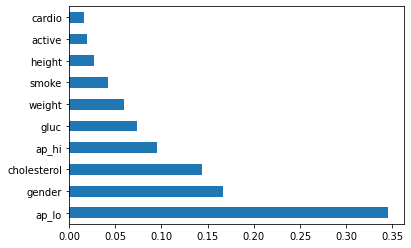

In [76]:
feat_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

#### SVM

In [77]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
c_values = [10**x for x in range(-6,5)]
kernel = ['poly', 'rbf', 'sigmoid','linear']
# gamma = [1,0.1,0.01,0.001]
gamma = ['auto']
f1_score_val = []
for k in kernel:
    for c in c_values:
        for g in gamma:
            model_svm = SVC(C=c, kernel=k)
            model_svm.fit(x_train,y_train)
            y_pred_test = model_svm.predict(x_test)
            acc = accuracy_score(y_test, y_pred_test)
            f1 = f1_score(y_test, y_pred_test)
            if acc > 0.73:
                print("kernel = %s C = %d gamma = %s, Accuracy = %.3f, F1-score = %.3f" % (k, c, g, acc, f1))

kernel = linear C = 10 gamma = auto, Accuracy = 0.736, F1-score = 0.711
kernel = linear C = 10000 gamma = auto, Accuracy = 0.732, F1-score = 0.707


In [79]:
model_svm = SVC(C=10, kernel='linear')
model_svm.fit(x_train,y_train)
y_pred_test = model_svm.predict(x_test)
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print("SVM Accuracy = %.3f, F1-score = %.3f"% (acc, f1))
# kagggle score=0.68800 (SVC(c=10))

SVM Accuracy = 0.736, F1-score = 0.711


#### K-Nearest Neighbors

In [80]:
from sklearn.neighbors import KNeighborsClassifier
for n_neighbors in range(1, 100):
    model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights="distance")
    model_knn.fit(x_train,y_train)
    y_pred_test = model_knn.predict(x_test)
    acc = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    if acc > 0.70:
        print("n_neighbors = %d, Accuracy: %.3f, F1-score = %.3f" % (n_neighbors, acc, f1))

n_neighbors = 38, Accuracy: 0.708, F1-score = 0.678
n_neighbors = 40, Accuracy: 0.720, F1-score = 0.696
n_neighbors = 41, Accuracy: 0.704, F1-score = 0.681
n_neighbors = 42, Accuracy: 0.704, F1-score = 0.681
n_neighbors = 50, Accuracy: 0.704, F1-score = 0.684
n_neighbors = 54, Accuracy: 0.704, F1-score = 0.684
n_neighbors = 55, Accuracy: 0.704, F1-score = 0.684
n_neighbors = 89, Accuracy: 0.704, F1-score = 0.664
n_neighbors = 91, Accuracy: 0.708, F1-score = 0.670
n_neighbors = 93, Accuracy: 0.704, F1-score = 0.667
n_neighbors = 95, Accuracy: 0.704, F1-score = 0.667
n_neighbors = 96, Accuracy: 0.708, F1-score = 0.676
n_neighbors = 97, Accuracy: 0.716, F1-score = 0.682
n_neighbors = 99, Accuracy: 0.708, F1-score = 0.673


In [81]:
model_knn = KNeighborsClassifier(n_neighbors=55, weights="distance")
model_knn.fit(x_train,y_train)
y_pred_test = model_knn.predict(x_test)
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print("KNN Accuracy = %.3f, F1-score = %.3f"% (acc, f1))

KNN Accuracy = 0.704, F1-score = 0.684


#### Bagging Classifier

In [82]:
from sklearn.ensemble import BaggingClassifier
from numpy import arange

base_estimators = [10, 50, 100, 200, 400]
for n in base_estimators:
    for i in arange(0.1, 1.1, 0.1):
        model_bagging = BaggingClassifier(n_estimators = n, max_samples = i)
        model_bagging.fit(x_train,y_train)
        y_pred_test = model_bagging.predict(x_test)
        acc = accuracy_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        if acc > 0.72 and f1 > 0.72:
            print("n_estimators = %d max_samples = %.2f, Accuracy: %.3f, F1-score = %.3f" % (n, i, acc, f1))

n_estimators = 50 max_samples = 0.10, Accuracy: 0.736, F1-score = 0.723
n_estimators = 100 max_samples = 0.20, Accuracy: 0.740, F1-score = 0.721
n_estimators = 400 max_samples = 0.10, Accuracy: 0.732, F1-score = 0.722


In [86]:
model_bagging = BaggingClassifier(n_estimators = 100, max_samples = 0.2)
model_bagging.fit(x_train,y_train)
y_pred_test = model_bagging.predict(x_test)
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print("Bagging Accuracy = %.3f, F1-score = %.3f"% (acc, f1))
# kagggle score=0.68800 (Bagging(DT, 50, 0.2))

Bagging Accuracy = 0.748, F1-score = 0.736


#### Voting Classifier

In [88]:
from sklearn.ensemble import VotingClassifier
model_voting = VotingClassifier(estimators=[('rf', model_rf), ('knn', model_knn),('svc', model_svm)], voting='hard')
model_voting.fit(x_train,y_train)
y_pred_test = model_voting.predict(x_test)
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print("Voting Classifier Accuracy = %.3f, F1-score = %.3f"% (acc, f1))

Voting Classifier Accuracy = 0.732, F1-score = 0.712


#### Evaluate models

In [89]:
test_data = pd.read_csv("cardio-test.csv", sep=",")
print(test_data.shape)
test_data.head()

(250, 12)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,47997,20222,Men,156,57.0,110,70,Normal,Normal,0,1,0
1,15311,18079,Men,160,60.0,120,80,Normal,Normal,0,0,1
2,44269,20279,Women,170,80.0,140,69,Normal,Normal,0,0,1
3,91373,23227,Men,158,80.0,160,90,High,Normal,0,0,1
4,9686,20461,Men,158,92.0,140,90,Normal,Above Normal,0,0,0


In [90]:
test_data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
dtype: int64

In [91]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
test_data = preprocess(test_data)
scaler = StandardScaler()
test_data = pd.DataFrame(scaler.fit_transform(test_data))

In [92]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.217526,-0.743502,-1.047999,-1.126201,-0.967672,-0.107793,0.485211,0.356904,-0.318311,3.702146,-1.760216
1,-0.533600,-0.743502,-0.552257,-0.917645,-0.373133,-0.088149,0.485211,0.356904,-0.318311,-0.270114,0.568112
2,0.367751,1.344987,0.687099,0.472726,0.815946,-0.109758,0.485211,0.356904,-0.318311,-0.270114,0.568112
3,1.569553,-0.743502,-0.800128,0.472726,2.005024,-0.068504,-1.050266,0.356904,-0.318311,-0.270114,0.568112
4,0.367751,-0.743502,-0.800128,1.306949,0.815946,-0.068504,0.485211,-3.284977,-0.318311,-0.270114,-1.760216


#### n. Upload your test data predictions to Kaggle competition in the correct submission format.
#### o. Use the cardio-validation.csv and cardio-train.csv as well to make your final prediction.

In [99]:
# REPLACE CLF
final_model = model_rf

#train the model on training + validation data
final_model.fit(x_train.append(x_test), y_train.append(y_test))

# generate submission file
y_pred_submission = final_model.predict(test_data)
df_result = pd.DataFrame(y_pred_submission,columns=["cardio"])
sample = pd.read_csv("sample-submission.csv")
df_result_final = pd.concat([sample.loc[:,"id"],df_result], axis=1)
df_result_final.to_csv("submissions/submit-final-rf-1.csv", index=False)

In [100]:
df_result_final

,id,cardio
0,47997,0
1,15311,0
2,44269,1
3,91373,1
4,9686,1
...,...,...
245,46137,0
246,58058,1
247,30608,0
248,83845,0


## Task 2

In [101]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

cardio_complete_data = pd.read_csv("cardio-complete .csv")
print(cardio_complete_data.shape)
cardio_complete_data.head()

(1000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,66667,20252,Women,161,62.0,140,90,High,High,0,0,1,1
1,22956,21129,Men,166,66.0,125,70,Normal,Normal,1,0,1,0
2,40536,16602,Men,160,74.0,140,90,Normal,Normal,0,0,1,0
3,39712,15172,Men,167,77.0,120,80,Normal,Normal,0,0,1,0
4,82165,19858,Women,176,93.0,140,90,Above Normal,Normal,0,1,1,1


In [102]:
#checking presence of NaN values
cardio_complete_data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [103]:
cardio_complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   age          1000 non-null   int64  
 2   gender       1000 non-null   object 
 3   height       1000 non-null   int64  
 4   weight       1000 non-null   float64
 5   ap_hi        1000 non-null   int64  
 6   ap_lo        1000 non-null   int64  
 7   cholesterol  1000 non-null   object 
 8   gluc         1000 non-null   object 
 9   smoke        1000 non-null   int64  
 10  alco         1000 non-null   int64  
 11  active       1000 non-null   int64  
 12  cardio       1000 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 101.7+ KB


In [104]:
cardio_complete_data.describe()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,49937.141000,19430.11200,164.288000,74.256200,126.221000,88.654000,0.080000,0.045000,0.798000,0.51000
std,28540.044455,2491.98155,8.415811,14.141323,19.316969,83.606641,0.271429,0.207408,0.401693,0.50015
min,135.000000,14344.00000,109.000000,36.000000,7.000000,40.000000,0.000000,0.000000,0.000000,0.00000
25%,25325.750000,17622.50000,159.000000,64.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.00000
50%,49517.000000,19716.00000,164.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,1.00000
75%,74524.000000,21311.75000,170.000000,83.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.00000
max,99699.000000,23655.00000,194.000000,140.000000,215.000000,1100.000000,1.000000,1.000000,1.000000,1.00000


**Observations:**
- The cardio complete data has 0 null values. Hence, we will require less preprocessing for this data. 
- Complete data has 1000 rows while in task 1, training data had 500 rows and validation data had 500 rows. So in this part, we have more data to fit the model.

In [105]:
# same preprocessing as task 1 (except missing data imputation is not needed)
cardio_complete_data = preprocess(cardio_complete_data)
cardio_complete_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,55.0,1,161,62.0,140,90,1,1,0,0,1,1
1,58.0,0,166,66.0,125,70,2,2,1,0,1,0
2,45.0,0,160,74.0,140,90,2,2,0,0,1,0
3,42.0,0,167,77.0,120,80,2,2,0,0,1,0
4,54.0,1,176,93.0,140,90,0,2,0,1,1,1


In [106]:
y = cardio_complete_data.loc[:,"cardio"]
X = cardio_complete_data.drop("cardio", 1)

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=1)
y_test_task2 = y_test.copy()

In [108]:
c_values = [100, 10, 1.0, 0.1, 0.01]
for c in c_values:
    model_log_reg2 = LogisticRegression(C = c, max_iter = 5000)
    model_log_reg2.fit(x_train,y_train)
    y_pred_test = model_log_reg2.predict(x_test)
    acc = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    print("C = %.2f, Accuracy = %.3f, F1-score = %.3f" % (c, acc, f1))

C = 100.00, Accuracy = 0.680, F1-score = 0.680
C = 10.00, Accuracy = 0.680, F1-score = 0.680
C = 1.00, Accuracy = 0.685, F1-score = 0.687
C = 0.10, Accuracy = 0.695, F1-score = 0.700
C = 0.01, Accuracy = 0.705, F1-score = 0.704


In [109]:
model_log_reg2 = LogisticRegression(C = 0.01, max_iter = 5000)
model_log_reg2.fit(x_train,y_train)
y_pred_test = model_log_reg2.predict(x_test)
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print("Logistic Regression Accuracy in Task 2= %.3f, F1-score = %.3f"% (acc, f1))
y_pred_task2 = y_pred_test.copy()

Logistic Regression Accuracy in Task 2= 0.705, F1-score = 0.704


In [110]:
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Model = Logistic Regression")
print("For Task 1 : Accuracy = %.3f, Precision = %.3f, Recall = %.3f, F1-score = %.3f" 
      % (accuracy_score(y_test_task1, y_pred_task1), precision_score(y_test_task1, y_pred_task1),
        recall_score(y_test_task1, y_pred_task1), f1_score(y_test_task1, y_pred_task1)))
print("For Task 2 : Accuracy = %.3f, Precision = %.3f, Recall = %.3f, F1-score = %.3f" 
      % (accuracy_score(y_test_task2, y_pred_task2), precision_score(y_test_task2, y_pred_task2),
        recall_score(y_test_task2, y_pred_task2), f1_score(y_test_task2, y_pred_task2)))

Model = Logistic Regression
For Task 1 : Accuracy = 0.716, Precision = 0.720, Recall = 0.691, F1-score = 0.705
For Task 2 : Accuracy = 0.705, Precision = 0.722, Recall = 0.686, F1-score = 0.704


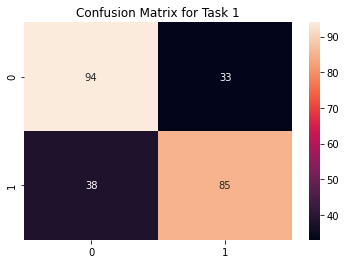

In [111]:
conf_matrix_task1 = confusion_matrix(y_test_task1, y_pred_task1)
plt.title("Confusion Matrix for Task 1")
sns.heatmap(conf_matrix_task1, annot=True, fmt="")
plt.show()

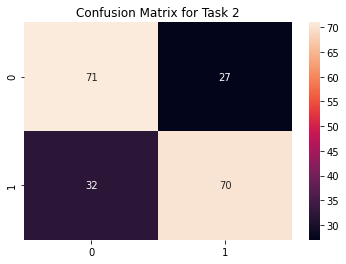

In [112]:
conf_matrix_task2 = confusion_matrix(y_test_task2, y_pred_task2)
plt.title("Confusion Matrix for Task 2")
sns.heatmap(conf_matrix_task2, annot=True, fmt="")
plt.show()

## Task 3

In [113]:
# fetching same data as Task 1
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

train_data = pd.read_csv("cardio-train.csv", sep=";")
validation_data = pd.read_csv("cardio-validation.csv", sep=",")
train_data = preprocess(train_data)
validation_data = preprocess(validation_data)
y_train = train_data.loc[:,"cardio"]
x_train = train_data.drop("cardio", 1)
y_test = validation_data.loc[:,"cardio"]
x_test = validation_data.drop("cardio", 1)

In [114]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly2 = poly.fit_transform(x_train)
x_test_poly2 = poly.fit_transform(x_test)
len(x_train_poly2[0])

78

In [115]:
model_log_reg3_poly2 = LogisticRegression(max_iter = 50000)
model_log_reg3_poly2.fit(x_train_poly2,y_train)
y_pred_train = model_log_reg3_poly2.predict(x_train_poly2)
y_pred_test = model_log_reg3_poly2.predict(x_test_poly2)
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print("Logistic Regression Accuracy in Task 3 (degree = 2) = %.3f, F1-score = %.3f"% (acc, f1))
print("train accuracy with degree 2: ", accuracy_score(y_train,y_pred_train.round()))
print("test accuracy with degree 2: ", accuracy_score(y_test,y_pred_test.round()))

Logistic Regression Accuracy in Task 3 (degree = 2) = 0.692, F1-score = 0.662
train accuracy with degree 2:  0.736
test accuracy with degree 2:  0.692


In [116]:
poly_more = PolynomialFeatures(degree=3)
x_train_poly_more = poly_more.fit_transform(x_train)
x_test_poly_more = poly_more.fit_transform(x_test)
len(x_train_poly_more[0])

364

In [117]:
model_log_reg3_poly_more = LogisticRegression(max_iter = 50000)
model_log_reg3_poly_more.fit(x_train_poly_more,y_train)
y_pred_train = model_log_reg3_poly_more.predict(x_train_poly_more)
y_pred_test = model_log_reg3_poly_more.predict(x_test_poly_more)
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print("Logistic Regression Accuracy in Task 3 (degree = 3) = %.3f, F1-score = %.3f"% (acc, f1))
print("train accuracy with degree 3: ", accuracy_score(y_train,y_pred_train.round()))
print("test accuracy with degree 3: ", accuracy_score(y_test,y_pred_test.round()))

Logistic Regression Accuracy in Task 3 (degree = 3) = 0.672, F1-score = 0.647
train accuracy with degree 3:  0.792
test accuracy with degree 3:  0.672


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
from sklearn.model_selection import learning_curve
# Reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

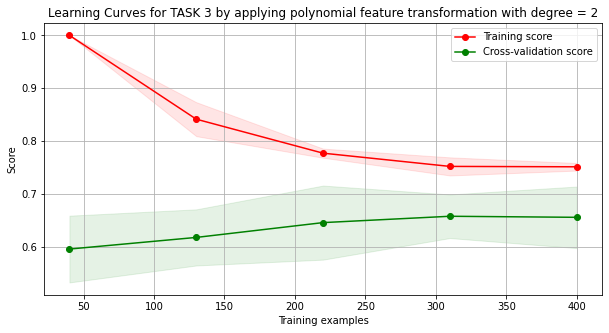

In [120]:
title = r"Learning Curves for TASK 3 by applying polynomial feature transformation with degree = 2"
model_log_reg3 = LogisticRegression(max_iter = 50000)
plot_learning_curve(model_log_reg3, title, x_train_poly2, y_train, n_jobs=-1)
plt.show()

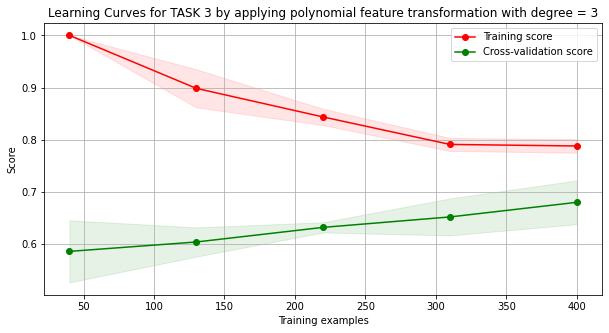

In [121]:
title = r"Learning Curves for TASK 3 by applying polynomial feature transformation with degree = 3"
model_log_reg3_poly_more = LogisticRegression(max_iter = 50000)
plot_learning_curve(model_log_reg3_poly_more, title, x_train_poly_more, y_train, n_jobs=-1)
plt.show()

- train accuracy with degree 2:  0.736
- test accuracy with degree 2:  0.692
- train accuracy with degree 3:  0.792
- test accuracy with degree 3:  0.672


From the above data, we can see a bigger difference between train and test accuracy when the degree 3, this indicates OVERFITTING.